## Learning Algorithms - Supervised Learning

>  Reminder:  All supervised estimators in scikit-learn implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations X, returns the predicted labels y. (direct quote from `sklearn` docs)

* Given that Iris is a fairly small, labeled dataset with relatively few features...what algorithm would you start with and why?

> "Often the hardest part of solving a machine learning problem can be finding the right estimator for the job."

> "Different estimators are better suited for different types of data and different problems."

<a href = "http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html" style = "float: right">-Choosing the Right Estimator from sklearn docs</a>


<b>An estimator for recognizing a new iris from its measurements</b>

> Or, in machine learning parlance, we <i>fit</i> an estimator on known samples of the iris measurements to <i>predict</i> the class to which an unseen iris belongs.

Let's give it a try!  (We are actually going to hold out a small percentage of the `iris` dataset and check our predictions against the labels)

In [25]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn import tree

# Let's load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# split data into training and test sets using the handy train_test_split func
# in this split, we are "holding out" only one value and label (placed into X_test and y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1)

In [26]:
# Let's try a decision tree classification method
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
# Let's predict on our "held out" sample
y_pred = tree.predict(X_test)

In [28]:
tree.score(X_test, y_test)

1.0

In [13]:
# What was the label associated with this test sample? ("held out" sample's original label)
#  fill in the blank below

# how did our prediction do?
print("Prediction: %d, Original label: %d" % (y_pred[0], ___)) # <-- fill in blank

TypeError: %d format: a number is required, not numpy.ndarray

#### EXERCISE:  enter in your own iris data point and see what the prediction is (what limitation do you think you might encounter here?)

### What does the graph look like for this decision tree?
* Note:  You need both Graphviz app and the python wrapper `graphviz`
* To install both on OS X:
```
sudo port install graphviz
sudo pip install graphviz
```
* For general Installation see [this guide](http://graphviz.readthedocs.org/en/latest/manual.html)

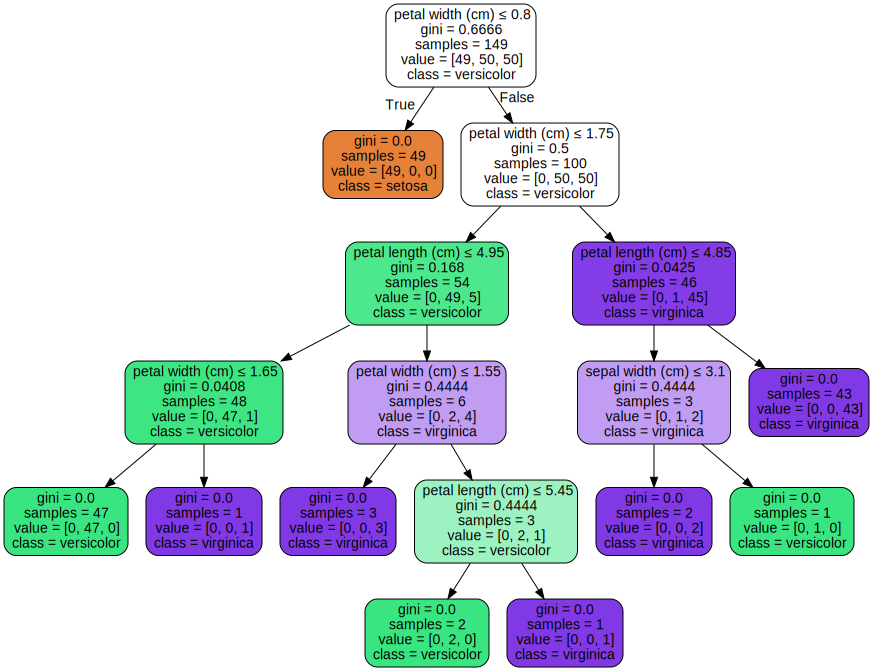

In [39]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="mytree.dot",  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph, format = 'png')

### From Decision Tree to Random Forest

In [23]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_jobs=2)

forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

forest = forest.fit(X_train, y_train)

y_preds = iris.target_names[forest.predict(X_test)]



forest.score(X_test, y_test)

0.93333333333333335

### Splitting into train and test set vs. cross-validation (Bonus material)

<p>We can be explicit and use the `train_test_split` method in scikit-learn ( [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) ) as in (and as shown above for `iris` data):<p>

```python
# Create some data by hand and place 70% into a training set and the rest into a test set
# Here we are using labeled features (X - feature data, y - labels) in our made-up data
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70)
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
```

OR

Be more concise and

```python
import numpy as np
from sklearn import cross_validation, linear_model
X, y = np.arange(10).reshape((5, 2)), range(5)
clf = linear_model.LinearRegression()
score = cross_validation.cross_val_score(clf, X, y)
```

<p>There is also a `cross_val_predict` method to create estimates rather than scores ( [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_predict.html) )